<a href="https://colab.research.google.com/github/Nithin46/KDM_ICP12/blob/main/KDM_ICP12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

**Prediction: using the number of passengers (in units of thousands) this month, what is the number of passengers next month?**

We can write a simple function to convert our single column of data into a two-column dataset: the first column containing this month’s (t) passenger count and the second column containing next month’s (t+1) passenger count, to be predicted.

In [2]:
Data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv')

Data.columns

Index(['Month', 'Passengers'], dtype='object')

We are not interested in the date, given that each observation is separated by the same interval of one month. Therefore, when we load the dataset we can exclude the first column.

In [3]:
New_Data = Data['Passengers']

New_Data = np.array(New_Data).reshape(-1,1)

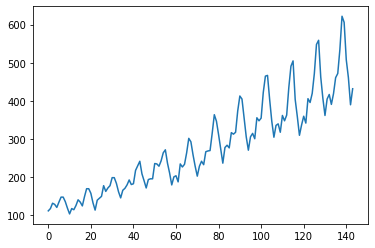

In [4]:
plt.plot(New_Data)

LSTMs are sensitive to the scale of the input data, specifically when the sigmoid (default) or tanh activation functions are used. It can be a good practice to rescale the data to the range of 0-to-1, also called normalizing. We can easily normalize the dataset using the MinMaxScaler preprocessing class from the scikit-learn library.

In [5]:
scaler = MinMaxScaler()
New_Data = scaler.fit_transform(New_Data)
print(New_Data)

[[0.01544402]
 [0.02702703]
 [0.05405405]
 [0.04826255]
 [0.03281853]
 [0.05984556]
 [0.08494208]
 [0.08494208]
 [0.06177606]
 [0.02895753]
 [0.        ]
 [0.02702703]
 [0.02123552]
 [0.04247104]
 [0.07142857]
 [0.05984556]
 [0.04054054]
 [0.08687259]
 [0.12741313]
 [0.12741313]
 [0.1042471 ]
 [0.05598456]
 [0.01930502]
 [0.06949807]
 [0.07915058]
 [0.08880309]
 [0.14285714]
 [0.11389961]
 [0.13127413]
 [0.14285714]
 [0.18339768]
 [0.18339768]
 [0.15444015]
 [0.11196911]
 [0.08108108]
 [0.11969112]
 [0.12934363]
 [0.14671815]
 [0.17181467]
 [0.14864865]
 [0.15250965]
 [0.22007722]
 [0.24324324]
 [0.26640927]
 [0.2027027 ]
 [0.16795367]
 [0.13127413]
 [0.17374517]
 [0.17760618]
 [0.17760618]
 [0.25482625]
 [0.25289575]
 [0.24131274]
 [0.26833977]
 [0.30888031]
 [0.32432432]
 [0.25675676]
 [0.20656371]
 [0.14671815]
 [0.18725869]
 [0.19305019]
 [0.16216216]
 [0.25289575]
 [0.23745174]
 [0.25096525]
 [0.30888031]
 [0.38223938]
 [0.36486486]
 [0.2992278 ]
 [0.24131274]
 [0.19111969]
 [0.24

In [6]:
New_Data.shape

(144, 1)

With time series data, the sequence of values is important. A simple method that we can use is to split the ordered dataset into train and test datasets.

In [7]:
train_size = 120
test_size = 24

In [8]:
train = New_Data[:train_size]
train.shape

(120, 1)

In [9]:
test = New_Data[train_size:144]
test.shape

(24, 1)

We can write a simple function to convert our single column of data into a two-column dataset: the first column containing this month’s (t) passenger count and the second column containing next month’s (t+1) passenger count, to be predicted.

In [10]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [11]:
look_back = 1
X_train, y_train = create_dataset(train, look_back)

In [12]:
print(X_train.shape)
print(y_train.shape)

(118, 1)
(118,)


In [13]:
look_back = 1
X_test, y_test = create_dataset(test, look_back)

In [14]:
print(X_test.shape)
print(y_test.shape)

(22, 1)
(22,)


In [15]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)
print("New training data shape:", X_train.shape)
print("New testing data shape:", X_test.shape)

New training data shape: (118, 1, 1)
New testing data shape: (22, 1, 1)


Now, Build a simple LSTM model on training data. The LSTM architecture here consists of:
1.   One input layer.
2.   Two LSTM layer of 4 blocks.
3.   Dropout values
4.   One Dense layer to produce a single output.
5.   Use MSE as loss function

In [16]:
model = Sequential()
model.add(LSTM(4,input_shape = (1, look_back),return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(4))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(loss = "mean_squared_error", optimizer = "adam")

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 4)              96        
_________________________________________________________________
dropout (Dropout)            (None, 1, 4)              0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 4)                 144       
_________________________________________________________________
dropout_1 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense (Dense)                (None, 1)                 5         
Total params: 245
Trainable params: 245
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(X_train, y_train, epochs = 100, batch_size = 10)

Epoch 1/100
12/12 [==============================] - 5s 4ms/step - loss: 0.0982
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 0.0788
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 0.0850
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 0.0766
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 0.0764
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 0.0643
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 0.0577
Epoch 8/100
12/12 [==============================] - 0s 4ms/step - loss: 0.0521
Epoch 9/100
12/12 [==============================] - 0s 4ms/step - loss: 0.0436
Epoch 10/100
12/12 [==============================] - 0s 4ms/step - loss: 0.0434
Epoch 11/100
12/12 [==============================] - 0s 4ms/step - loss: 0.0383
Epoch 12/100
12/12 [==============================] - 0s 4ms/step - loss: 0.0419
Epoch 13/100
12/12 [=================

In [19]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

In [20]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([y_test])

In [21]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Training Data Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Testing Data Score: %.2f RMSE' % (testScore))

Training Data Score: 47.56 RMSE
Testing Data Score: 104.60 RMSE


In [22]:
# Start with training predictions.
train_predict_plot = np.empty_like(New_Data)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back:len(trainPredict) + look_back, :] = trainPredict

# Add test predictions.
test_predict_plot = np.empty_like(New_Data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(trainPredict) + (look_back * 2) + 1:len(New_Data) - 1, :] = testPredict

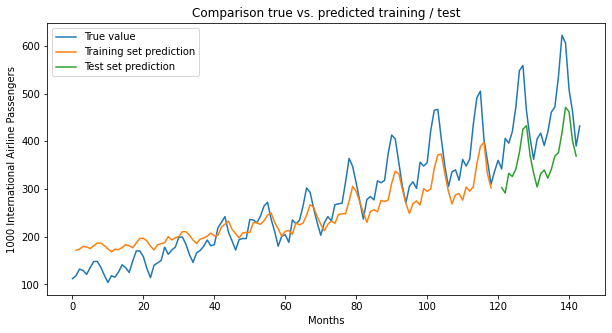

In [23]:
plt.figure(figsize = (10, 5))
plt.plot(scaler.inverse_transform(New_Data), label = "True value")

plt.plot(train_predict_plot, label = "Training set prediction")
plt.plot(test_predict_plot, label = "Test set prediction")

plt.xlabel("Months")
plt.ylabel("1000 International Airline Passengers")
plt.title("Comparison true vs. predicted training / test")
plt.legend()
plt.show()